<a href="https://colab.research.google.com/github/ChaukannaVyapari/DS-INTERNSHIP-MINI-PROJECT-IMAGE_CLASSIFICATION/blob/master/DS_INTERNSHIP_MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# importing the libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Loading Data
from keras.datasets import cifar10
(x_train,y_train), (x_test, y_test) = cifar10.load_data()
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

170500096/170498071 [==============================] - 4s 0us/step
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
# shape of the arrays
print('x_train SHAPE: ', x_train.shape)
print('y_train SHAPE: ', y_train.shape)
print('x_test SHAPE: ', x_test.shape)
print('y_test SHAPE: ', y_test.shape)

x_train SHAPE:  (50000, 32, 32, 3)
y_train SHAPE:  (50000, 1)
x_test SHAPE:  (10000, 32, 32, 3)
y_test SHAPE:  (10000, 1)


In [7]:
# Taking a look at the image
index = 6
x_train[index]

array([[[164, 206,  84],
        [105, 140,  61],
        [118, 148, 101],
        ...,
        [109, 147,  73],
        [108, 147,  69],
        [ 91, 129,  57]],

       [[167, 213,  84],
        [116, 160,  49],
        [ 72, 109,  43],
        ...,
        [105, 142,  79],
        [105, 142,  72],
        [ 89, 127,  57]],

       [[140, 191,  65],
        [142, 193,  66],
        [119, 163,  79],
        ...,
        [104, 139,  84],
        [ 84, 120,  58],
        [ 78, 115,  49]],

       ...,

       [[139, 148,  81],
        [142, 155,  74],
        [135, 156,  72],
        ...,
        [ 89, 134,  28],
        [ 97, 148,  24],
        [126, 176,  49]],

       [[163, 157,  85],
        [153, 164,  82],
        [146, 164,  90],
        ...,
        [ 85, 130,  19],
        [ 98, 148,  27],
        [127, 178,  48]],

       [[183, 153, 102],
        [176, 182, 116],
        [154, 154, 100],
        ...,
        [ 94, 134,  29],
        [ 91, 133,  26],
        [122, 170,  44]]

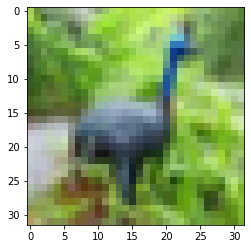

In [8]:
# showing images as a picture
img = plt.imshow(x_train[index])

In [9]:
# Getting the image label
print('THE IMAGE LABEL IS: ',y_train[index])

THE IMAGE LABEL IS:  [2]


In [10]:
# Getting Image Classification
classification = ['AIRPLANE', 'CAR', 'BIRD', 'CAT', 'DEER', 'DOG', 'FROG', 'HORSE', 'SHIP', 'TRUCK']
# printing image class
print('THE IMAGE CLASS IS: ', classification[y_train[index][0]])

THE IMAGE CLASS IS:  BIRD


In [11]:
# Convert the labels into a set of 10 numbers to input
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [12]:
# printing the new labelof the image
print('ONE HOT LABEL IS: ',y_train_one_hot[index])

ONE HOT LABEL IS:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [13]:
# Normalizing the pixels to be the values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [14]:
x_train[index]

array([[[0.64313725, 0.80784314, 0.32941176],
        [0.41176471, 0.54901961, 0.23921569],
        [0.4627451 , 0.58039216, 0.39607843],
        ...,
        [0.42745098, 0.57647059, 0.28627451],
        [0.42352941, 0.57647059, 0.27058824],
        [0.35686275, 0.50588235, 0.22352941]],

       [[0.65490196, 0.83529412, 0.32941176],
        [0.45490196, 0.62745098, 0.19215686],
        [0.28235294, 0.42745098, 0.16862745],
        ...,
        [0.41176471, 0.55686275, 0.30980392],
        [0.41176471, 0.55686275, 0.28235294],
        [0.34901961, 0.49803922, 0.22352941]],

       [[0.54901961, 0.74901961, 0.25490196],
        [0.55686275, 0.75686275, 0.25882353],
        [0.46666667, 0.63921569, 0.30980392],
        ...,
        [0.40784314, 0.54509804, 0.32941176],
        [0.32941176, 0.47058824, 0.22745098],
        [0.30588235, 0.45098039, 0.19215686]],

       ...,

       [[0.54509804, 0.58039216, 0.31764706],
        [0.55686275, 0.60784314, 0.29019608],
        [0.52941176, 0

In [15]:
# creating the model's architecture
model = Sequential()

# first layer
model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(32,32,3)) )
# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)) )
# another convolution layer
model.add(Conv2D(32, (5,5), activation = 'relu') )
# another pooling layer
model.add(MaxPooling2D(pool_size = (2,2)) )
# flattening layer
model.add(Flatten())
# add a layer with 1000 neurons
model.add(Dense(1000,activation = 'relu'))
# dropout layer
model.add(Dropout(0.5))
# another dense layer
model.add(Dense(500,activation='relu'))
# dropout layer
model.add(Dropout(0.5))
# another dense layer
model.add(Dense(250,activation='relu'))
# another dense layer
model.add(Dense(10,activation='softmax'))

COMPILING THE MODEL

In [16]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

TRAINING THE MODEL

In [17]:
hist = model.fit(x_train, y_train_one_hot, batch_size = 256, epochs = 10, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 56s 354ms/step - loss: 1.7857 - accuracy: 0.3291 - val_loss: 1.5478 - val_accuracy: 0.4346
Epoch 2/10
157/157 [==============================] - 55s 351ms/step - loss: 1.4284 - accuracy: 0.4742 - val_loss: 1.3197 - val_accuracy: 0.5317
Epoch 3/10
157/157 [==============================] - 55s 351ms/step - loss: 1.2908 - accuracy: 0.5343 - val_loss: 1.2831 - val_accuracy: 0.5425
Epoch 4/10
157/157 [==============================] - 55s 350ms/step - loss: 1.1930 - accuracy: 0.5742 - val_loss: 1.1886 - val_accuracy: 0.5830
Epoch 5/10
157/157 [==============================] - 55s 351ms/step - loss: 1.1141 - accuracy: 0.6014 - val_loss: 1.1272 - val_accuracy: 0.6017
Epoch 6/10
157/157 [==============================] - 55s 350ms/step - loss: 1.0457 - accuracy: 0.6279 - val_loss: 1.0715 - val_accuracy: 0.6263
Epoch 7/10
157/157 [==============================] - 55s 351ms/step - loss: 0.9818 - accuracy: 0.6541 - val_loss: 1.0681 - val_ac

In [18]:
#Evaluate the model
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 5s 16ms/step - loss: 0.9506 - accuracy: 0.6696


0.6696000099182129

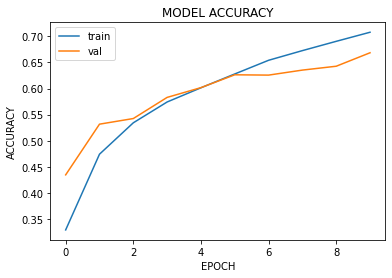

In [19]:
# visualizing model's accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('MODEL ACCURACY')
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')
plt.legend(['train','val'],loc='upper left')
plt.show()

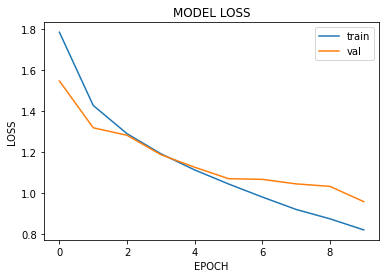

In [20]:
# Visualizing models's losses
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('MODEL LOSS')
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.legend(['train','val'],loc='upper right')
plt.show()

TESTING THE MODEL

In [21]:
from google.colab import files
uploaded = files.upload()

Saving TuSimple_Self_Drving_Truck_4_copy.jpg to TuSimple_Self_Drving_Truck_4_copy.jpg


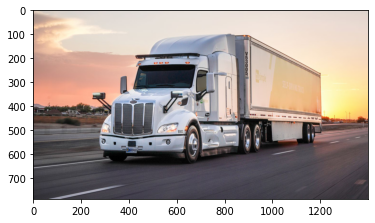

In [22]:
#showing the image
import matplotlib.pyplot as plt
image = plt.imread('TuSimple_Self_Drving_Truck_4_copy.jpg')
img = plt.imshow(image)

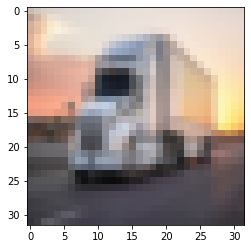

In [23]:
# Resizing the image
from skimage.transform import resize
resized_image = resize(image, (32, 32, 3))
img = plt.imshow(resized_image) 

SEEING MODEL'S PREDICTION

In [24]:
prediction = model.predict(np.array([resized_image]))
prediction

array([[9.4689056e-03, 1.3400604e-01, 2.2307246e-03, 3.6365001e-03,
        9.6561090e-04, 2.1110482e-03, 5.8731646e-04, 2.0771553e-03,
        6.9332267e-03, 8.3798343e-01]], dtype=float32)

In [25]:
# Sorting the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = prediction
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

print(list_index) # showing the label in order

[9, 1, 0, 8, 3, 2, 5, 7, 4, 6]


In [27]:
# Printing the first 2 predictions
print('***PREDICTIONS***')
for i in range(2):
  print(classification[list_index[i]], ': ', round(prediction[0][list_index[i]] * 100, 2), '%')

***PREDICTIONS***
TRUCK :  83.8 %
CAR :  13.4 %
